In [1]:
# pip installs
#!pip install pulp
#!pip install pandas
#!pip install xlsxwriter
# Import initial libraries. Not all are needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import time
import random
from numpy import linalg as LA
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import scipy
from scipy import optimize as opt
import csv
import os
#!pip install xlrd>=2.0.1
#import pulp

In [1]:
# Read in the Cobra result fil
test_cobra_book_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\test\SummaryExcelReport.xls'

In [4]:
test_cobra_book = pd.ExcelFile(test_cobra_book_path)

test_cobra_nonmortality = pd.DataFrame()

for sheet_name in test_cobra_book.sheet_names:
  # Turn them into dataframes
  temp_df_1 = pd.read_excel(test_cobra_book_path, sheet_name=sheet_name)

  # Process them into numbers instead of strings, specify which incidents we desire
  test_cobra_nonmortality[sheet_name] = pd.to_numeric(temp_df_1['Unnamed: 1'], errors='coerce')[[10,15,18]]

In [6]:
temp_df_1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Total Health Benefits,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,$11,NaN,$26
3,NaN,Low Value,NaN,High Value
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,Change in Incidence,NaN,Monetary Value
7,Mortality,0.000 / 0.000,NaN,$11 / $25
8,Nonfatal Heart Attacks,0.000 / 0.000,NaN,$0 / $0
9,Infant Mortality,0.000,NaN,$0


In [2]:
### Prep pollutant results

# Load the Excel file
scenarioBaseline_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenarioBaseline\scenarioBaseline_x_variable_values.xlsx'
scenario1_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenario1\scenario1_x_variable_values.xlsx'
scenario2_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenario2\scenario2_x_variable_values.xlsx'
scenario3_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenario3\scenario3_x_variable_values.xlsx'

scenarioBaseline_xls = pd.ExcelFile(scenarioBaseline_file_path)
scenario1_xls = pd.ExcelFile(scenario1_file_path)
scenario2_xls = pd.ExcelFile(scenario2_file_path)
scenario3_xls = pd.ExcelFile(scenario3_file_path)

NOx_coeffs = [0, 0.000383062, 0, 0.002370279, 0.214675997, 0, 0, 0] # ton/MWh
SO2_coeffs = [0, 1.21402E-05, 0, 0.000935558, 0.002477377, 0, 0, 0] # ton/MWh
CO2_coeffs = [0, 2.238202261, 0, 1.457428724, 3.131424223, 0, 0, 0] # ton/MWh
CH4_coeffs = [0, 0.086635868, 0, 1.859068599, 0.112107014, 0, 0, 0] # lb/MWh

# Initialize a dictionary to store sheet totals
scenarioBaseline_NOx_sheet_totals = {}
scenarioBaseline_SO2_sheet_totals = {}
scenarioBaseline_CO2_sheet_totals = {}
scenarioBaseline_CH4_sheet_totals = {}

scenario1_NOx_sheet_totals = {}
scenario1_SO2_sheet_totals = {}
scenario1_CO2_sheet_totals = {}
scenario1_CH4_sheet_totals = {}

scenario2_NOx_sheet_totals = {}
scenario2_SO2_sheet_totals = {}
scenario2_CO2_sheet_totals = {}
scenario2_CH4_sheet_totals = {}

scenario3_NOx_sheet_totals = {}
scenario3_SO2_sheet_totals = {}
scenario3_CO2_sheet_totals = {}
scenario3_CH4_sheet_totals = {}


# Iterate through each sheet
for sheet_name in scenario3_xls.sheet_names:
    # Load each sheet into a DataFrame
    scenarioBaseline_df = pd.read_excel(scenarioBaseline_file_path, sheet_name=sheet_name)
    scenario1_df = pd.read_excel(scenario1_file_path, sheet_name=sheet_name)
    scenario2_df = pd.read_excel(scenario2_file_path, sheet_name=sheet_name)
    scenario3_df = pd.read_excel(scenario3_file_path, sheet_name=sheet_name)

    # Perform element-wise multiplication with the row vector
    scenarioBaseline_NOx_multiplied_df = scenarioBaseline_df * NOx_coeffs
    scenarioBaseline_SO2_multiplied_df = scenarioBaseline_df * SO2_coeffs
    scenarioBaseline_CO2_multiplied_df = scenarioBaseline_df * CO2_coeffs
    scenarioBaseline_CH4_multiplied_df = scenarioBaseline_df * CH4_coeffs

    scenario1_NOx_multiplied_df = scenario1_df * NOx_coeffs
    scenario1_SO2_multiplied_df = scenario1_df * SO2_coeffs
    scenario1_CO2_multiplied_df = scenario1_df * CO2_coeffs
    scenario1_CH4_multiplied_df = scenario1_df * CH4_coeffs

    scenario2_NOx_multiplied_df = scenario2_df * NOx_coeffs
    scenario2_SO2_multiplied_df = scenario2_df * SO2_coeffs
    scenario2_CO2_multiplied_df = scenario2_df * CO2_coeffs
    scenario2_CH4_multiplied_df = scenario2_df * CH4_coeffs

    scenario3_NOx_multiplied_df = scenario3_df * NOx_coeffs
    scenario3_SO2_multiplied_df = scenario3_df * SO2_coeffs
    scenario3_CO2_multiplied_df = scenario3_df * CO2_coeffs
    scenario3_CH4_multiplied_df = scenario3_df * CH4_coeffs

    # Sum the totals on each sheet
    scenarioBaseline_NOx_sheet_total = scenarioBaseline_NOx_multiplied_df.sum().sum()
    scenarioBaseline_NOx_sheet_totals[sheet_name] = scenarioBaseline_NOx_sheet_total
    scenarioBaseline_SO2_sheet_total = scenarioBaseline_SO2_multiplied_df.sum().sum()
    scenarioBaseline_SO2_sheet_totals[sheet_name] = scenarioBaseline_SO2_sheet_total
    scenarioBaseline_CO2_sheet_total = scenarioBaseline_CO2_multiplied_df.sum().sum()
    scenarioBaseline_CO2_sheet_totals[sheet_name] = scenarioBaseline_CO2_sheet_total
    scenarioBaseline_CH4_sheet_total = scenarioBaseline_CH4_multiplied_df.sum().sum()
    scenarioBaseline_CH4_sheet_totals[sheet_name] = scenarioBaseline_CH4_sheet_total

    scenario1_NOx_sheet_total = scenario1_NOx_multiplied_df.sum().sum()
    scenario1_NOx_sheet_totals[sheet_name] = scenario1_NOx_sheet_total
    scenario1_SO2_sheet_total = scenario1_SO2_multiplied_df.sum().sum()
    scenario1_SO2_sheet_totals[sheet_name] = scenario1_SO2_sheet_total
    scenario1_CO2_sheet_total = scenario1_CO2_multiplied_df.sum().sum()
    scenario1_CO2_sheet_totals[sheet_name] = scenario1_CO2_sheet_total
    scenario1_CH4_sheet_total = scenario1_CH4_multiplied_df.sum().sum()
    scenario1_CH4_sheet_totals[sheet_name] = scenario1_CH4_sheet_total

    scenario2_NOx_sheet_total = scenario2_NOx_multiplied_df.sum().sum()
    scenario2_NOx_sheet_totals[sheet_name] = scenario2_NOx_sheet_total
    scenario2_SO2_sheet_total = scenario2_SO2_multiplied_df.sum().sum()
    scenario2_SO2_sheet_totals[sheet_name] = scenario2_SO2_sheet_total
    scenario2_CO2_sheet_total = scenario2_CO2_multiplied_df.sum().sum()
    scenario2_CO2_sheet_totals[sheet_name] = scenario2_CO2_sheet_total
    scenario2_CH4_sheet_total = scenario2_CH4_multiplied_df.sum().sum()
    scenario2_CH4_sheet_totals[sheet_name] = scenario2_CH4_sheet_total

    scenario3_NOx_sheet_total = scenario3_NOx_multiplied_df.sum().sum()
    scenario3_NOx_sheet_totals[sheet_name] = scenario3_NOx_sheet_total
    scenario3_SO2_sheet_total = scenario3_SO2_multiplied_df.sum().sum()
    scenario3_SO2_sheet_totals[sheet_name] = scenario3_SO2_sheet_total
    scenario3_CO2_sheet_total = scenario3_CO2_multiplied_df.sum().sum()
    scenario3_CO2_sheet_totals[sheet_name] = scenario3_CO2_sheet_total
    scenario3_CH4_sheet_total = scenario3_CH4_multiplied_df.sum().sum()
    scenario3_CH4_sheet_totals[sheet_name] = scenario3_CH4_sheet_total



# Convert the dictionary to a DataFrame
scenarioBaseline_NOx_totals_df = pd.DataFrame(list(scenarioBaseline_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenarioBaseline_SO2_totals_df = pd.DataFrame(list(scenarioBaseline_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenarioBaseline_CO2_totals_df = pd.DataFrame(list(scenarioBaseline_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenarioBaseline_CH4_totals_df = pd.DataFrame(list(scenarioBaseline_CH4_sheet_totals.items()), columns=['Year', 'Total'])

scenario1_NOx_totals_df = pd.DataFrame(list(scenario1_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenario1_SO2_totals_df = pd.DataFrame(list(scenario1_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario1_CO2_totals_df = pd.DataFrame(list(scenario1_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario1_CH4_totals_df = pd.DataFrame(list(scenario1_CH4_sheet_totals.items()), columns=['Year', 'Total'])

scenario2_NOx_totals_df = pd.DataFrame(list(scenario2_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenario2_SO2_totals_df = pd.DataFrame(list(scenario2_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario2_CO2_totals_df = pd.DataFrame(list(scenario2_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario2_CH4_totals_df = pd.DataFrame(list(scenario2_CH4_sheet_totals.items()), columns=['Year', 'Total'])

scenario3_NOx_totals_df = pd.DataFrame(list(scenario3_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenario3_SO2_totals_df = pd.DataFrame(list(scenario3_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario3_CO2_totals_df = pd.DataFrame(list(scenario3_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario3_CH4_totals_df = pd.DataFrame(list(scenario3_CH4_sheet_totals.items()), columns=['Year', 'Total'])

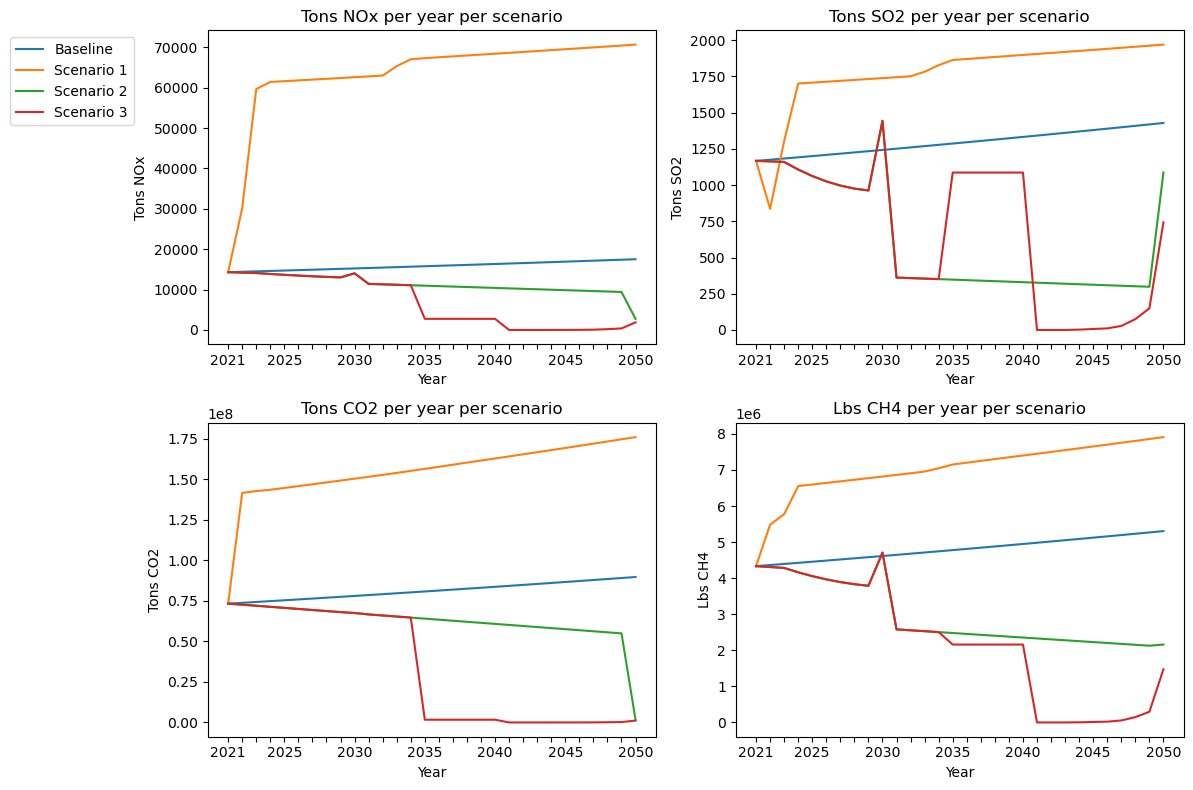

In [3]:
# Create a 2-by-2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, 36)]

#plt.legend(["Baseline", "Scenario 1", "Scenario 2", "Scenario 3"], loc = 'outside upper right')

# NOx plot
axs[0, 0].plot(scenarioBaseline_NOx_totals_df['Year'][:-5], scenarioBaseline_NOx_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[0, 0].plot(scenario1_NOx_totals_df['Year'][:-5], scenario1_NOx_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[0, 0].plot(scenario2_NOx_totals_df['Year'][:-5], scenario2_NOx_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[0, 0].plot(scenario3_NOx_totals_df['Year'][:-5], scenario3_NOx_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[0, 0].set_title('Tons NOx per year per scenario')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Tons NOx')
axs[0, 0].set_xticks(range(0, 30), ticks[:-6])
axs[0, 0].legend(["Baseline", "Scenario 1", "Scenario 2", "Scenario 3"], loc='upper right', bbox_to_anchor=(-0.15, 1))

#, bbox_to_anchor=(1, 1)

# SO2 plot
axs[0, 1].plot(scenarioBaseline_SO2_totals_df['Year'][:-5], scenarioBaseline_SO2_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[0, 1].plot(scenario1_SO2_totals_df['Year'][:-5], scenario1_SO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[0, 1].plot(scenario2_SO2_totals_df['Year'][:-5], scenario2_SO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[0, 1].plot(scenario3_SO2_totals_df['Year'][:-5], scenario3_SO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[0, 1].set_title('Tons SO2 per year per scenario')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Tons SO2')
axs[0, 1].set_xticks(range(0, 30), ticks[:-6])


# CO2 plot
axs[1, 0].plot(scenarioBaseline_CO2_totals_df['Year'][:-5], scenarioBaseline_CO2_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[1, 0].plot(scenario1_CO2_totals_df['Year'][:-5], scenario1_CO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[1, 0].plot(scenario2_CO2_totals_df['Year'][:-5], scenario2_CO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[1, 0].plot(scenario3_CO2_totals_df['Year'][:-5], scenario3_CO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[1, 0].set_title('Tons CO2 per year per scenario')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Tons CO2')
axs[1, 0].set_xticks(range(0, 30), ticks[:-6])


# CH4 plot
axs[1, 1].plot(scenarioBaseline_CH4_totals_df['Year'][:-5], scenarioBaseline_CH4_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[1, 1].plot(scenario1_CH4_totals_df['Year'][:-5], scenario1_CH4_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[1, 1].plot(scenario2_CH4_totals_df['Year'][:-5], scenario2_CH4_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[1, 1].plot(scenario3_CH4_totals_df['Year'][:-5], scenario3_CH4_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[1, 1].set_title('Lbs CH4 per year per scenario')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Lbs CH4')
axs[1, 1].set_xticks(range(0, 30), ticks[:-6])


plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area without overlapping
plt.show()


In [348]:
N = 30
#850    9790
#1231    10160
#874    -1109
#range(0,5)
for n in range(0,7):
    print(round(scenario3_SO2_totals_df['Total'][n]-212.92), '  ' , round(scenario3_NOx_totals_df['Total'][n]-3862.29))

954    10444
951    10333
947    10222
895    9997
850    9790
813    9602
784    9431


In [20]:
test_cobra_book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\test\\SummaryExcelReport.xls'

test_cobra_book = pd.ExcelFile(test_cobra_book_path)

test_cobra_nonmortality = pd.DataFrame()

for sheet_name in test_cobra_book.sheet_names:
  # Turn them into dataframes
  temp_df_1 = pd.read_excel(test_cobra_book_path, sheet_name=sheet_name)

  # Process them into numbers instead of strings, specify which incidents we desire
  test_cobra_nonmortality[sheet_name] = pd.to_numeric(temp_df_1['Unnamed: 1'], errors='coerce')[[10,15,18]]

In [24]:
scenario = '3'

test = pd.DataFrame()

for n in range(0,5):
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    print(book_path)

    cobra_book = pd.ExcelFile(book_path)

    nonmortality = pd.DataFrame()

    for sheet_name in cobra_book.sheet_names: #kind of unnecesary in this version, since there's only one sheet...
      # Turn them into dataframes
      temp_df_1 = pd.read_excel(book_path, sheet_name=sheet_name)

      # Process them into numbers instead of strings, specify which incidents we desire
      nonmortality[sheet_name] = pd.to_numeric(temp_df_1['Unnamed: 1'], errors='coerce')[[10,15,18]]
    
    test[str(n)] = nonmortality
        
test


#We will go ahead and just manually 

C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_0.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_1.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_2.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_3.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_4.xls


,0,1,2,3,4
10,-1.892,-1.876,-1.859,-1.802,-1.750
15,-5.085,-5.041,-4.996,-4.841,-4.703
18,-981.362,-972.604,-963.612,-935.100,-909.534


In [ ]:
scenario = '3'

test = pd.DataFrame()

for n in range(0,5):
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    print(book_path)

    cobra_book = pd.ExcelFile(book_path)
    
    nonmortality = pd.DataFrame()

    for sheet_name in cobra_book.sheet_names: #kind of unnecesary in this version, since there's only one sheet...
      # Turn them into dataframes
      temp_df_1 = pd.read_excel(book_path, sheet_name=sheet_name)

      # Process them into numbers instead of strings, specify which incidents we desire
      nonmortality[sheet_name] = pd.to_numeric(temp_df_1['Unnamed: 1'], errors='coerce')[[10,15,18]]
    
    test[str(n)] = nonmortality
        
test


#We will go ahead and just manually 

In [41]:
book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
print(book_path)

cobra_book = pd.ExcelFile(book_path)

nonmortality = pd.DataFrame()

for sheet_name in cobra_book.sheet_names: #kind of unnecesary in this version, since there's only one sheet...
  # Turn them into dataframes
  temp_df_1 = pd.read_excel(book_path, sheet_name=sheet_name)

  # Process them into numbers instead of strings, specify which incidents we desire
  #nonmortality[sheet_name] = pd.to_numeric(temp_df_1['Unnamed: 1'], errors='coerce')
    
temp_df_1
mortality_interval = temp_df_1['Unnamed: 1'][7].split('/') #
mortality_low = float(mortality_interval[0])
mortality_high = float(mortality_interval[1])
mortality_high

C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_4.xls


-16.432

In [119]:
scenario = '3'

test = pd.DataFrame()

for n in range(0,5):
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    print(book_path)
    temp_df = pd.read_excel(book_path)
    
    nonmortality = pd.to_numeric(temp_df['Unnamed: 1'], errors='coerce')[[10,15,18]]
    nonmortality = pd.DataFrame(nonmortality)
    nonmortality.columns = [str(n)]
    
    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])
    mortality = pd.DataFrame([{str(n): mortality_low}, {str(n): mortality_high}])
    
    
    test[str(n)] = pd.concat([mortality, nonmortality])

print(test)
adder = np.array([0, 0, 7.612, 20.829, 4488.686])
test2 = -test
test2 = test2.add(adder, axis = 0)
print(test2)

C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_0.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_1.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_2.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_3.xls
C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\cobra_runs\scenario3_4.xls
          0        1        2        3        4
0    -7.844   -7.776   -7.706   -7.471   -7.260
1   -17.754  -17.599  -17.440  -16.908  -16.432
10   -1.892   -1.876   -1.859   -1.802   -1.750
15   -5.085   -5.041   -4.996   -4.841   -4.703
18 -981.362 -972.604 -963.612 -935.100 -909.534
           0         1         2         3         4
0      7.844     7.776     7.706     7.471     7.260
1     17.754    17.599    17.440    16.908    16.432
10     9.504     9.488     9.471     9.414     9.362
15    25.914    25.870    25.825    25.670    25.532
18  5470.048  5461.290

In [159]:
temp_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Total Health Benefits,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,"$29,003,821",NaN,"$65,448,463"
3,NaN,Low Value,NaN,High Value
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,Change in Incidence,NaN,Monetary Value
7,Mortality,2.607 / 5.900,NaN,"$28,528,003 / $64,559,027"
8,Nonfatal Heart Attacks,0.311 / 2.893,NaN,"$49,886 / $463,504"
9,Infant Mortality,0.010,NaN,"$119,339"


In [166]:
#pd.to_numeric(temp_df['Unnamed: 1'], errors='coerce')
float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))

29003821.0

In [242]:
#Getting baseline from running NJ with electrical utility SO2 and NOxzeroed out.
temp_df = pd.read_excel('C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\cobra_lower_limit.xls')

lower_limit = pd.DataFrame(index = range(15), columns = [str(0)])
lower_limit['0'][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))

mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
mortality_low = float(mortality_interval[0])
mortality_high = float(mortality_interval[1])

nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

lower_limit['0'][1] = mortality_low
lower_limit['0'][2] = mortality_high
lower_limit['0'][3] = nonfatal_heart_attacks_low
lower_limit['0'][4] = nonfatal_heart_attacks_high



for entry_number in range(0,10):
    lower_limit['0'][5+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    print(entry_number, temp_df['Unnamed: 1'][9+entry_number])
lower_limit    

0 0.010
1 0.624
2 0.677
3 3.509
4 63.586
5 44.647
6 1.679
7 65.874
8 1956.929
9 330.117


,0
0,29003821.0
1,2.607
2,5.9
3,0.311
4,2.893
5,0.01
6,0.624
7,0.677
8,3.509
9,63.586


In [443]:


###########################################################################################

scenario = 'Baseline'

scenarioBaseline_cobra_df = pd.DataFrame(index = range(15), columns = [str(n) for n in range(14)])

for n in range(14):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenarioBaseline_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))

    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenarioBaseline_cobra_df[str(n)][1] = mortality_low
    scenarioBaseline_cobra_df[str(n)][2] = mortality_high
    scenarioBaseline_cobra_df[str(n)][3] = nonfatal_heart_attacks_low
    scenarioBaseline_cobra_df[str(n)][4] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenarioBaseline_cobra_df[str(n)][5+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenarioBaseline_cobra_array = scenarioBaseline_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenarioBaseline_cobra_array+lower_limit_array
scenarioBaseline_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(14)])
    
diffs = scenarioBaseline_cobra_results_df.diff(axis=1)
    
num_additional_columns = 16
for i in range(num_additional_columns):
    next_column = scenarioBaseline_cobra_results_df.iloc[:, -1] + diffs.iloc[:, -1]  # Calculate the next column by adding the difference to the last column
    scenarioBaseline_cobra_results_df = pd.concat([scenarioBaseline_cobra_results_df, next_column], axis=1)  # Append the next column to the DataFrame

scenarioBaseline_cobra_results_df.columns = [str(n) for n in range(num_additional_columns+14)]
    
    
###########################################################################################  


N = 19
    

###########################################################################################  


    
scenario = '1'

scenario1_cobra_df = pd.DataFrame(index = range(15), columns = [str(n) for n in range(N)])

for n in range(N):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenario1_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))

    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenario1_cobra_df[str(n)][1] = mortality_low
    scenario1_cobra_df[str(n)][2] = mortality_high
    scenario1_cobra_df[str(n)][3] = nonfatal_heart_attacks_low
    scenario1_cobra_df[str(n)][4] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenario1_cobra_df[str(n)][5+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenario1_cobra_array = scenario1_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenario1_cobra_array+lower_limit_array
scenario1_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(N)])


diffs = scenario1_cobra_results_df.diff(axis=1)
    
num_additional_columns = 11
for i in range(num_additional_columns):
    next_column = scenario1_cobra_results_df.iloc[:, -1] + diffs.iloc[:, -1]  # Calculate the next column by adding the difference to the last column
    scenario1_cobra_results_df = pd.concat([scenario1_cobra_results_df, next_column], axis=1)  # Append the next column to the DataFrame

scenario1_cobra_results_df.columns = [str(n) for n in range(num_additional_columns+19)]
    
###########################################################################################



N=30    

scenario = '2'

scenario2_cobra_df = pd.DataFrame(index = range(15), columns = [str(n) for n in range(N)])

for n in range(N):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenario2_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))

    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenario2_cobra_df[str(n)][1] = mortality_low
    scenario2_cobra_df[str(n)][2] = mortality_high
    scenario2_cobra_df[str(n)][3] = nonfatal_heart_attacks_low
    scenario2_cobra_df[str(n)][4] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenario2_cobra_df[str(n)][5+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenario2_cobra_array = scenario2_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenario2_cobra_array+lower_limit_array
scenario2_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(N)])
    
    
     
###########################################################################################
    
    
    
N=30

scenario = '3'

scenario3_cobra_df = pd.DataFrame(index = range(15), columns = [str(n) for n in range(N)])

for n in range(N):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenario3_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))

    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenario3_cobra_df[str(n)][1] = mortality_low
    scenario3_cobra_df[str(n)][2] = mortality_high
    scenario3_cobra_df[str(n)][3] = nonfatal_heart_attacks_low
    scenario3_cobra_df[str(n)][4] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenario3_cobra_df[str(n)][5+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenario3_cobra_array = scenario3_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenario3_cobra_array+lower_limit_array
scenario3_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(N)])    

In [350]:
lower_limit

,0
0,29003821.0
1,2.607
2,5.9
3,0.311
4,2.893
5,0.01
6,0.624
7,0.677
8,3.509
9,63.586


In [403]:
scenarioBaseline_cobra_results_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,116267904.0,117100360.0,117915699.0,118737263.0,119558828.0,120409959.0,121243973.0,122101331.0,122941571.0,123811378.0,...,138861121.0,139749604.0,140638087.0,141526570.0,142415053.0,143303536.0,144192019.0,145080502.0,145968985.0,146857468.0
1,10.451,10.526,10.6,10.673,10.747,10.824,10.899,10.976,11.051,11.13,...,12.484,12.564,12.644,12.724,12.804,12.884,12.964,13.044,13.124,13.204
2,23.654,23.823,23.989,24.156,24.324,24.497,24.666,24.841,25.012,25.189,...,28.254,28.435,28.616,28.797,28.978,29.159,29.34,29.521,29.702,29.883
3,1.25,1.259,1.268,1.276,1.285,1.294,1.303,1.313,1.322,1.331,...,1.499,1.509,1.519,1.529,1.539,1.549,1.559,1.569,1.579,1.589
4,11.62,11.703,11.784,11.867,11.949,12.034,12.117,12.203,12.287,12.374,...,13.881,13.97,14.059,14.148,14.237,14.326,14.415,14.504,14.593,14.682
5,0.039,0.04,0.04,0.04,0.04,0.041,0.041,0.041,0.042,0.042,...,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043
6,2.516,2.535,2.552,2.57,2.588,2.606,2.624,2.643,2.661,2.68,...,3.002,3.021,3.04,3.059,3.078,3.097,3.116,3.135,3.154,3.173
7,2.726,2.745,2.764,2.783,2.803,2.823,2.842,2.862,2.882,2.902,...,3.244,3.264,3.284,3.304,3.324,3.344,3.364,3.384,3.404,3.424
8,13.964,14.064,14.162,14.261,14.359,14.462,14.562,14.665,14.766,14.87,...,16.682,16.789,16.896,17.003,17.11,17.217,17.324,17.431,17.538,17.645
9,252.967,254.775,256.549,258.338,260.127,261.976,263.793,265.656,267.486,269.377,...,302.107,304.039,305.971,307.903,309.835,311.767,313.699,315.631,317.563,319.495


In [425]:
scenario1_cobra_results_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,116267904.0,207120799.0,401794099.0,421971286.0,423306896.0,424648735.0,426003031.0,427357328.0,428753659.0,430126643.0,...,471611606.0,473132556.0,474653506.0,476174456.0,477695406.0,479216356.0,480737306.0,482258256.0,483779206.0,485300156.0
1,10.451,18.615,36.111,37.925,38.045,38.166,38.287,38.409,38.535,38.658,...,42.385,42.521,42.657,42.793,42.929,43.065,43.201,43.337,43.473,43.609
2,23.654,42.133,81.746,85.855,86.127,86.4,86.675,86.951,87.235,87.515,...,95.96,96.27,96.58,96.89,97.2,97.51,97.82,98.13,98.44,98.75
3,1.25,2.218,4.3,4.519,4.533,4.547,4.562,4.576,4.591,4.606,...,5.052,5.069,5.086,5.103,5.12,5.137,5.154,5.171,5.188,5.205
4,11.62,20.621,40.0,42.033,42.166,42.3,42.435,42.57,42.709,42.846,...,46.981,47.132,47.283,47.434,47.585,47.736,47.887,48.038,48.189,48.34
5,0.039,0.07,0.136,0.143,0.143,0.144,0.144,0.145,0.145,0.146,...,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.17
6,2.516,4.423,8.565,9.011,9.039,9.068,9.097,9.126,9.156,9.185,...,10.072,10.105,10.138,10.171,10.204,10.237,10.27,10.303,10.336,10.369
7,2.726,4.808,9.313,9.793,9.824,9.855,9.887,9.918,9.951,9.983,...,10.947,10.983,11.019,11.055,11.091,11.127,11.163,11.199,11.235,11.271
8,13.964,25.3,49.211,51.572,51.735,51.899,52.065,52.23,52.4,52.568,...,57.645,57.831,58.017,58.203,58.389,58.575,58.761,58.947,59.133,59.319
9,252.967,458.22,890.745,933.432,936.382,939.346,942.337,945.329,948.409,951.442,...,1043.186,1046.544,1049.902,1053.26,1056.618,1059.976,1063.334,1066.692,1070.05,1073.408


In [393]:
scenario2_cobra_results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,116267904.0,115507037.0,114722829.0,112108716.0,109770030.0,107736333.0,105995177.0,104565229.0,103427817.0,120966022.0,79436015.0,78651846.0,77891017.0,77106849.0
1,10.451,10.383,10.313,10.078,9.867,9.684,9.528,9.399,9.297,10.874,7.14,7.069,7.001,6.93
2,23.654,23.499,23.34,22.808,22.332,21.918,21.564,21.273,21.041,24.611,16.158,15.998,15.843,15.684
3,1.25,1.242,1.233,1.205,1.18,1.158,1.139,1.124,1.111,1.302,0.851,0.842,0.834,0.826
4,11.62,11.544,11.466,11.203,10.968,10.763,10.588,10.445,10.331,12.105,7.909,7.831,7.755,7.677
5,0.039,0.039,0.039,0.038,0.037,0.036,0.036,0.035,0.035,0.041,0.027,0.027,0.027,0.026
6,2.516,2.5,2.483,2.426,2.374,2.329,2.291,2.26,2.235,2.629,1.699,1.682,1.665,1.649
7,2.726,2.708,2.69,2.627,2.572,2.523,2.482,2.448,2.422,2.845,1.846,1.827,1.81,1.791
8,13.964,13.871,13.776,13.47,13.197,12.958,12.753,12.583,12.447,14.451,9.686,9.591,9.498,9.402
9,252.967,251.284,249.554,244.024,239.068,234.745,231.027,227.957,225.492,261.782,175.499,173.769,172.086,170.356


In [394]:
scenario3_cobra_results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,116267904.0,115507037.0,114722829.0,112108716.0,109770030.0,107736333.0,105995177.0,104565229.0,103427817.0,120966022.0,79436015.0,78651846.0,77891017.0,77106849.0
1,10.451,10.383,10.313,10.078,9.867,9.684,9.528,9.399,9.297,10.874,7.14,7.069,7.001,6.93
2,23.654,23.499,23.34,22.808,22.332,21.918,21.564,21.273,21.041,24.611,16.158,15.998,15.843,15.684
3,1.25,1.242,1.233,1.205,1.18,1.158,1.139,1.124,1.111,1.302,0.851,0.842,0.834,0.826
4,11.62,11.544,11.466,11.203,10.968,10.763,10.588,10.445,10.331,12.105,7.909,7.831,7.755,7.677
5,0.039,0.039,0.039,0.038,0.037,0.036,0.036,0.035,0.035,0.041,0.027,0.027,0.027,0.026
6,2.516,2.5,2.483,2.426,2.374,2.329,2.291,2.26,2.235,2.629,1.699,1.682,1.665,1.649
7,2.726,2.708,2.69,2.627,2.572,2.523,2.482,2.448,2.422,2.845,1.846,1.827,1.81,1.791
8,13.964,13.871,13.776,13.47,13.197,12.958,12.753,12.583,12.447,14.451,9.686,9.591,9.498,9.402
9,252.967,251.284,249.554,244.024,239.068,234.745,231.027,227.957,225.492,261.782,175.499,173.769,172.086,170.356


In [ ]:
$
#Mortality high
Mortality low
Nonfatal Heart Attacks high
Nonfatal Heart Attacks low
Infant Mortality
Hospital Admits, All Respiratory
#Hospital Admits, Cardiovascular (except heart attacks)
Acute Bronchitis
Upper Respiratory Symptoms
Lower Respiratory Symptoms
#Emergency Room Visits, Asthma
Asthma Exacerbation
Minor Restricted Activity Days
#Work Loss Days


In [ ]:
["Mortality high","Hospital Admits, Cardiovascular (except heart attacks)","Emergency Room Visits, Asthma","Work Loss Days"]

In [386]:
#for n in range(14,20):
#    print(round(scenario3_SO2_totals_df['Total'][n]-212.92), '  ' , round(scenario3_NOx_totals_df['Total'][n]-3862.29))

In [440]:
for n in range(20,24):
    print(round(scenario3_SO2_totals_df['Total'][n]-212.92), '  ' , round(scenario3_NOx_totals_df['Total'][n]-3862.29))

-213    -3862
-213    -3862
-213    -3862
-211    -3857


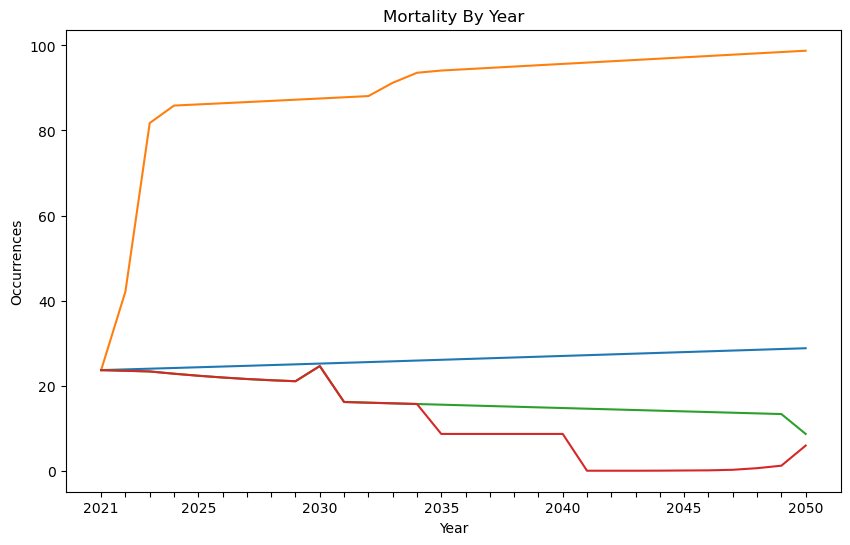

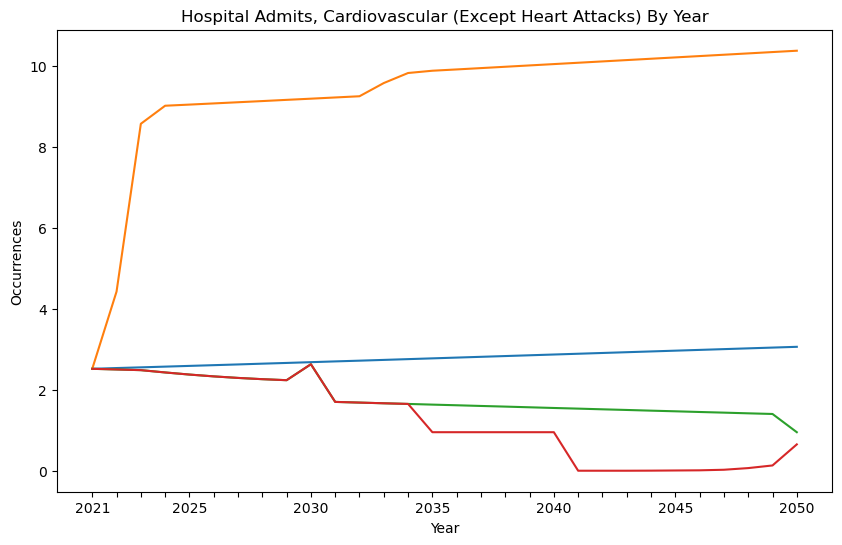

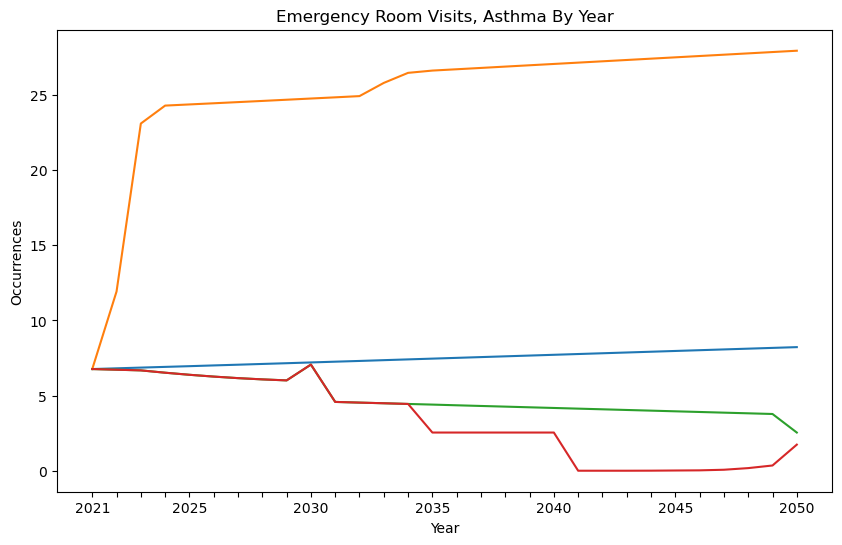

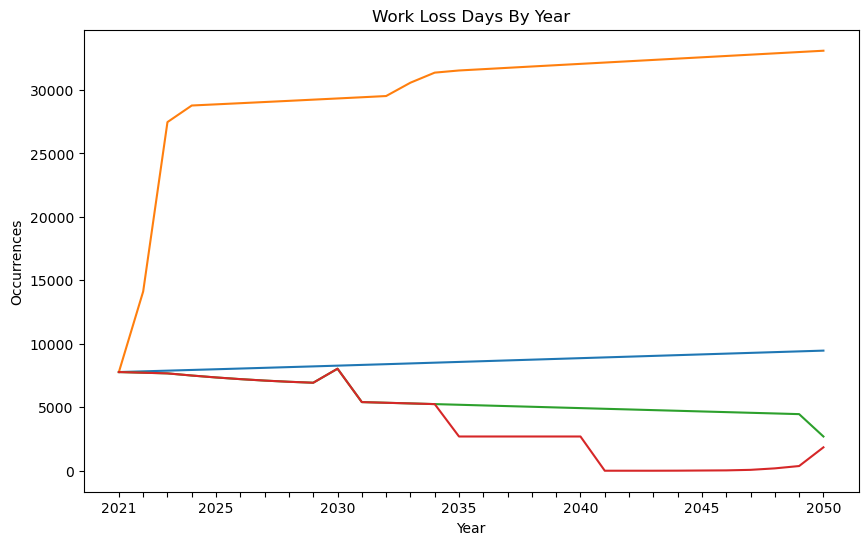

In [446]:
N = 30
damage_names = ["Mortality","Hospital Admits, Cardiovascular (Except Heart Attacks)","Emergency Room Visits, Asthma","Work Loss Days"]
damage_indices = [2, 6, 11, 13]
counter = 0
for damage_index in damage_indices:
    # Extract the third row data from each DataFrame
    third_row_baseline = scenarioBaseline_cobra_results_df.iloc[damage_index]  # Assuming index 2 represents the third row
    third_row_scenario1 = scenario1_cobra_results_df.iloc[damage_index]
    third_row_scenario2 = scenario2_cobra_results_df.iloc[damage_index]
    third_row_scenario3 = scenario3_cobra_results_df.iloc[damage_index]

    # Plotting the third row data from each DataFrame on the same plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.plot(third_row_baseline, label='Baseline')
    plt.plot(third_row_scenario1, label='Scenario 1')
    plt.plot(third_row_scenario2, label='Scenario 2')
    plt.plot(third_row_scenario3, label='Scenario 3')

    plt.xlabel('Year')  # Customize x-axis label if needed
    plt.ylabel('Occurrences')  # Customize y-axis label if needed
    plt.title('{insertion} By Year'.format(insertion = damage_names[counter]))  # Customize plot title if needed
    
    ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, N)]
    plt.xticks(range(0, N), ticks)
    
    #plt.legend()  # Show legend with DataFrame names

    #plt.grid(True)  # Add grid if needed
    plt.show()
    counter = counter+1

In [451]:
scenario3_cobra_results_df.to_excel('C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario3_cobra_results.xlsx', index=False)